In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
X = data.iloc[:,[3, 4]].values

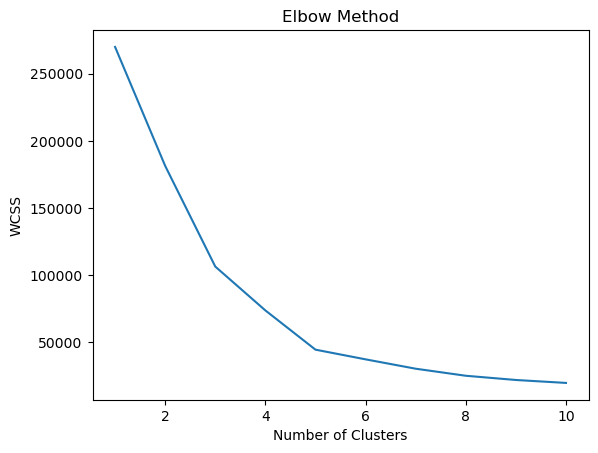

In [29]:
# Elbow method to find optimal number of clusters
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # sum of all the squared distance between each point and centroid.

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

5 looks like our elbow

In [30]:
# Train KMeans on 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [31]:
# kmeans has fit_predict method that we can use to predict its cluster
y_kmeans = kmeans.fit_predict(X)

In [32]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

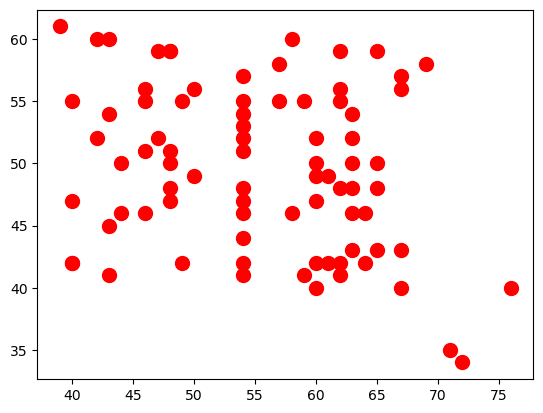

In [40]:
# Lets see all points that belong to 0 cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'r', label = "Cluster 1")
plt.show()

In [45]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

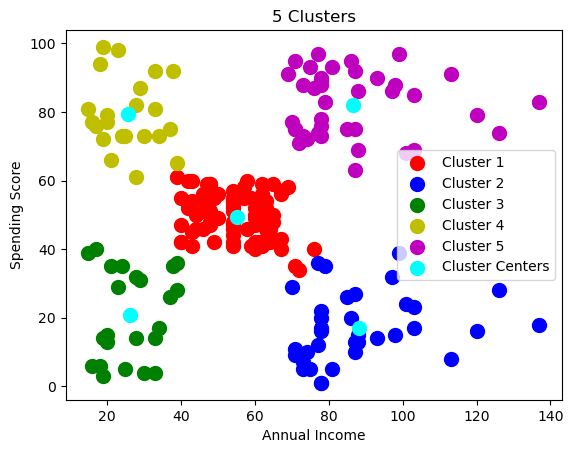

In [48]:
# Visualise the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'r', label = "Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'b', label = "Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c = 'g', label = "Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s = 100, c = 'y', label = "Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1], s = 100, c = 'm', label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Cluster Centers') # Centroids
plt.title("5 Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend() # Plots labels
plt.show()

In [4]:
# data = pd.get_dummies(data, columns = ["Genre"])
# data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False


In [12]:
# cat_cols = data.select_dtypes(include=["object"]).columns.tolist()

In [14]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)
# one_hot_encoded = ohe.fit_transform(data[cat_cols])

In [16]:
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(cat_cols))
# one_hot_df.head()

,Genre_Female,Genre_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [19]:
# final_df = pd.concat((data,one_hot_df), axis = 1).drop(cat_cols, axis = 1)